In [1]:
# Figure 8 flowchart 
import os 
from locscale.include.emmer.ndimage.map_utils import load_map, save_as_mrc 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

output_folder = "/home/abharadwaj1/dev/map_sharpening/emmernet/emmernet/scripts/misc/monte_carlo_samples_large/9112_cube_15/"


In [2]:
input_map_path = os.path.join(output_folder, "input_map.mrc")
mean_map_path = os.path.join(output_folder, "mean_map.mrc")
var_map_path = os.path.join(output_folder, "var_map.mrc")
output_map_path = os.path.join(output_folder, "output_map.mrc")
monte_carlo_map_paths = {k: os.path.join(output_folder, f"monte_carlo_sample_{k}.mrc") for k in range(0, 49)}
# assert all paths exist
assert os.path.exists(input_map_path)
assert os.path.exists(mean_map_path)
assert os.path.exists(var_map_path)
assert os.path.exists(output_map_path)
for path in monte_carlo_map_paths.values():
    assert os.path.exists(path)

In [3]:
input_map, apix = load_map(input_map_path)
mean_map, _ = load_map(mean_map_path)
var_map, _ = load_map(var_map_path)
output_map, _ = load_map(output_map_path)
monte_carlo_maps = {k: load_map(v)[0] for k, v in monte_carlo_map_paths.items()}

In [4]:
from locscale.include.emmer.ndimage.map_utils import resample_map
from locscale.include.emmer.ndimage.map_utils import extract_window

locscale_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/flowchart_feature_enhance/emd_9112_feature_enhance_locscale_output.mrc" 

locscale_map, apix_raw = load_map(locscale_map_path)

# resample to 1A 
resampled_locscale_map = resample_map(locscale_map, apix=apix_raw, apix_new=1, order=2)

cube_size = 32 
cubecenter = (88,88,112)

locscale_window = extract_window(resampled_locscale_map, cubecenter, cube_size)

locscale_save_path = os.path.join(output_folder, "locscale_window2.mrc")
save_as_mrc(locscale_window, locscale_save_path, apix=1)


In [5]:
def resample_and_cut(map_path):
    locscale_map, apix_raw = load_map(map_path)

    # resample to 1A 
    resampled_locscale_map = resample_map(locscale_map, apix=apix_raw, apix_new=1, order=2)

    cube_size = 32 
    cubecenter = (88,88,112)

    locscale_window = extract_window(resampled_locscale_map, cubecenter, cube_size)

    return locscale_window
    
probabilities_map_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/flowchart_feature_enhance/hallucinations_probabilities_map.mrc"

probabilities_window = resample_and_cut(probabilities_map_path)

hallucinations_save_path = os.path.join(output_folder, "hallucinations_probabilities_window2.mrc")

save_as_mrc(probabilities_window, hallucinations_save_path, apix=1)

In [6]:
zscores_calibrated_path = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/flowchart_feature_enhance/z_scores_calibrated.mrc"
zscores_window = resample_and_cut(zscores_calibrated_path)
# convert all nans to 0 
zscores_window[np.isnan(zscores_window)] = 0
zscores_save_path = os.path.join(output_folder, "zscores_window2.mrc")
save_as_mrc(zscores_window, zscores_save_path, apix=1)

In [7]:
new_mean_map = "/home/abharadwaj1/papers/elife_paper/figure_information/outputs/flowchart_feature_enhance/emd_9112_feature_enhance_mean.mrc"
mean_window_new = resample_and_cut(new_mean_map)
mean_save_path_new = os.path.join(output_folder, "mean_window_new2.mrc")
save_as_mrc(mean_window_new, mean_save_path_new, apix=1)

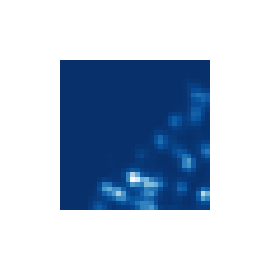

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(0.55, 0.55), dpi=600, tight_layout=True)
ax.imshow(var_map[24,:,:], cmap='Blues_r')
# hide axes
ax.axis('off')
# remove whitespace around figure

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "variance_slice.eps"),bbox_inches='tight')


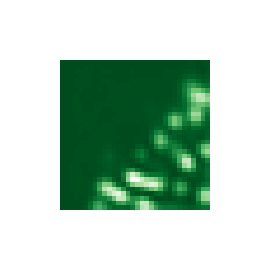

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(0.55, 0.55), dpi=600, tight_layout=True)
ax.imshow(mean_map[24,:,:], cmap='Greens_r')
# hide axes
ax.axis('off')
# remove whitespace around figure

plt.tight_layout()
plt.savefig(os.path.join(output_folder, "mean_slice.eps"),bbox_inches='tight')


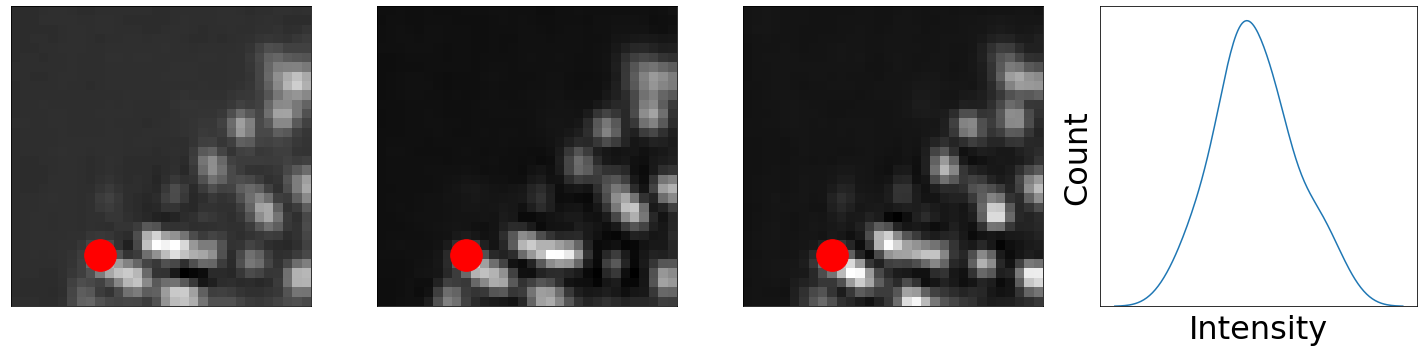

In [9]:
n_samples_plot = 3
fig, ax = plt.subplots(1, n_samples_plot+1, figsize=(20, 5))
index_top = 24
intensities_top = []
intensities_bottom = []
voxel_top = (9, 26, index_top)
font = "Helvetica"
fontsize = 32
# set font
plt.rcParams['font.family'] = font

for plot_index, i in enumerate(range(n_samples_plot)):
    ax[plot_index].imshow(monte_carlo_maps[i][index_top,:,:], cmap='gray')
    ax[plot_index].scatter(voxel_top[0], voxel_top[1], color='red', marker='o', s=1000)
    #ax[plot_index].set_title('Sample {}'.format(i*3+1))
    # remove y ticks for all but first plot
    ax[plot_index].set_yticks([])
    # set x ticks to 0 5 10 15 20 25
    ax[plot_index].set_xticks([])
    
    
intensities_top = [monte_carlo_map[voxel_top[0], voxel_top[1], voxel_top[2]] for monte_carlo_map in monte_carlo_maps.values()]

sns.kdeplot(intensities_top, ax=ax[plot_index+1])
ax[plot_index+1].set_xlabel('Intensity', fontsize=fontsize)
ax[plot_index+1].set_ylabel('Count', fontsize=fontsize)
ax[plot_index+1].set_xticks([])
ax[plot_index+1].set_yticks([])


plt.tight_layout()

figsavepath = os.path.join(output_folder, 'monte_carlo_samples_two_slices22.eps')
plt.savefig(figsavepath, dpi=600, bbox_inches='tight')
    

In [57]:
def plot_corrected_shaded_distribution():
    # Define the parameters for the normal distribution
    from scipy import stats
    mean = 0
    std_dev = 60
    x = np.linspace(-100, 100, 1000)
    y = stats.norm.pdf(x, mean, std_dev)

    # Plot the kernel density
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'k-', lw=2)

    # Define the regions and their respective colors
    regions = [(-100, -95), (-95, -80), (-80, 80), (80, 95), (95, 100)]
    colors = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff']

    # Fill the regions with the specified colors
    for region, color in zip(regions, colors):
        plt.fill_between(x, y, where=(x >= region[0]) & (x <= region[1]), color=color)

    plt.title('Shaded Kernel Density Plot of a Normal Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.yscale('log')
    plt.tight_layout()
    plt.show()

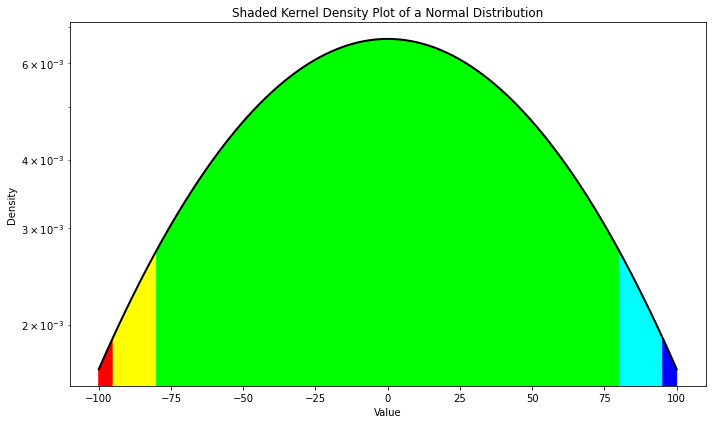

In [58]:
plot_corrected_shaded_distribution()

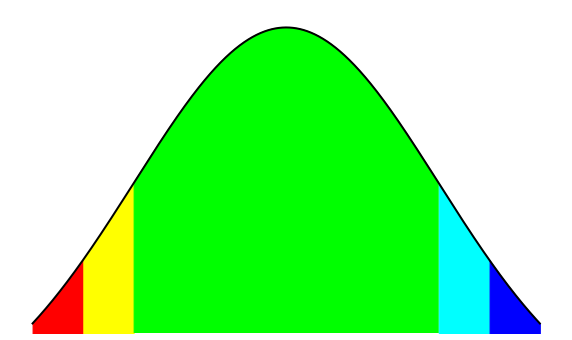

In [76]:
def plot_magnified_shaded_distribution():
    # Define the parameters for the normal distribution
    from scipy import stats
    mean = 0
    std_dev = 60
    x = np.linspace(-100, 100, 1000)
    y = stats.norm.pdf(x, mean, std_dev)

    # Plot the kernel density
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.plot(x, y, 'k-', lw=2)

    # Define the regions and their respective colors
    regions = [(-100, -80), (-80, -60), (-60, 60), (60, 80), (80, 100)]
    colors = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff']

    # Fill the regions with the specified colors
    for region, color in zip(regions, colors):
        ax.fill_between(x, y, where=(x >= region[0]) & (x <= region[1]), color=color)

    ax.set_ylim(0.0015, 0.007)
    
    ax.set_xticks([])
    ax.set_xticklabels([])
    # hide y ticks
    ax.set_yticks([])
    ax.set_yticklabels([])
    # hide the frame of the plot
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    return fig, ax

# Call the function to display the magnified plot
fig, ax = plot_magnified_shaded_distribution()
# Save the plot
figsavepath = os.path.join(output_folder, 'shaded_distribution.eps')
fig.savefig(figsavepath, dpi=600, bbox_inches='tight')



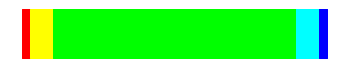

In [77]:
def create_legend_rectangle():
    # Define the parameters for the rectangle regions and their respective colors
    regions = [(-100, -95), (-95, -80), (-80, 80), (80, 95), (95, 100)]
    colors = ['#ff0000', '#ffff00', '#00ff00', '#00ffff', '#0000ff']

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(6, 1))
    for region, color in zip(regions, colors):
        ax.fill_between([region[0], region[1]], 0, 1, color=color)

    # Remove the axis
    ax.axis('off')
    
    return fig, ax

# Call the function to display the legend rectangle
fig, ax = create_legend_rectangle()
figsavepath = os.path.join(output_folder, 'shaded_distribution.eps')
fig.savefig(figsavepath, dpi=600, bbox_inches='tight')


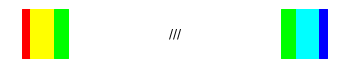

In [78]:
def create_modified_legend_rectangle():
    # Define the parameters for the rectangle regions and their respective colors
    # We modify the regions to shrink the green portion and introduce a break
    regions = [(-100, -95), (-95, -80), (-79, -70), (70, 80), (80, 95), (95, 100)]
    colors = ['#ff0000', '#ffff00', '#00ff00', '#00ff00', '#00ffff', '#0000ff']

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(6, 1))
    for region, color in zip(regions, colors):
        ax.fill_between([region[0], region[1]], 0, 1, color=color)

    # Add a break symbol in the green portion
    ax.text(0, 0.5, '///', ha='center', va='center', fontsize=12)

    # Remove the axis
    ax.axis('off')
    
    return fig, ax

# Call the function to display the modified legend rectangle
fig, ax = create_modified_legend_rectangle()
plt.show()
